<a href="https://colab.research.google.com/github/cm-int/machine-learning-fundamentals/blob/main/module_3/Labs/Lab3_1_Refining_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3.1: Refining a Machine Learning Model

In this lab, you'll perform the following tasks:

- Build a Logistic Regression model to classify the data without any modifications to the data
- Examine the results and measure the performance, especially the precision
-	Explore and refine the dataset
-	Recreate and retest the model
-	Repeat until the performance is optimized 

You'll also compare the performance of two models constructed using different algorithms.

## Scenario

This dataset is related to white variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. This is a binary dataset; the quality is either 'Poor' or 'Good'. Your task is to predict the quality of wine using the given data.

The dataset contains the following columns:

Input variables (based on physicochemical tests):\
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
12 - alkalinity\
13 - e330 level\
14 - effervescence index\
15 - consumable\
\
Output variable (based on sensory data):\
16 - quality (0=poor, 1=good)

## Acknowledgements:
This dataset is also available from Kaggle & UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

The solution code for this lab is available <a href="https://colab.research.google.com/github/cm-int/machine-learning-fundamentals/blob/main/module_3/Labs/Lab3_1_Refing_a_Model_solution.ipynb" target="_parent">here</a>

#Read the data

In [113]:
# Upload the winequalitywhites.csv file from Github

!wget 'https://raw.githubusercontent.com/cm-int/machine-learning-fundamentals/main/module_3/Labs/winequalitywhites.csv'

--2022-11-21 11:25:17--  https://raw.githubusercontent.com/cm-int/machine-learning-fundamentals/main/module_3/Labs/winequalitywhites.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379583 (371K) [text/plain]
Saving to: ‘winequalitywhites.csv.1’

winequalitywhites.c 100%[===================>] 370.69K  --.-KB/s    in 0.01s   

2022-11-21 11:25:17 (29.0 MB/s) - ‘winequalitywhites.csv.1’ saved [379583/379583]



In [319]:
import pandas as pd
import numpy as np

# Read the data into a Pandas DataFrame named wine_data

wine_data = pd.read_csv('winequalitywhites.csv')
wine_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,alkalinity,e330.level,effervescence.index,consumable,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,50.0,0.36,1502.286116,4,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,47.0,0.34,12000.814710,4,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,47.4,0.40,217.890104,4,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,48.1,0.32,2406.422787,4,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,48.1,0.32,9441.831148,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,47.3,0.29,6483.322130,4,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,48.5,0.36,10127.814400,4,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,50.1,0.19,6047.518477,4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,46.6,0.30,5176.570161,4,1


#Split the data

In [320]:
# Create the wine_features DataFrame with every column apart from quality

wine_features = wine_data.drop(['quality'], axis=1)
wine_features

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,alkalinity,e330.level,effervescence.index,consumable
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,50.0,0.36,1502.286116,4
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,47.0,0.34,12000.814710,4
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,47.4,0.40,217.890104,4
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,48.1,0.32,2406.422787,4
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,48.1,0.32,9441.831148,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,47.3,0.29,6483.322130,4
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,48.5,0.36,10127.814400,4
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,50.1,0.19,6047.518477,4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,46.6,0.30,5176.570161,4


In [321]:
# Create the wine_quality series containing only the quality column

wine_quality = wine_data['quality']
wine_quality

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64

In [323]:
# Split the data into training and test datasets

from sklearn.model_selection import train_test_split

features_train, features_test, predictions_train, predictions_test = train_test_split(wine_features, wine_quality, test_size=0.33, random_state=13)

#Create a Logistic Regression model to classify the data

In [326]:
# Create and fit the Logistic Regression model with the 'saga' solver and no regularization and an increased number of iterations and reduced tolerance (to allow the algorithm to converge)

from sklearn.linear_model import LogisticRegression

wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

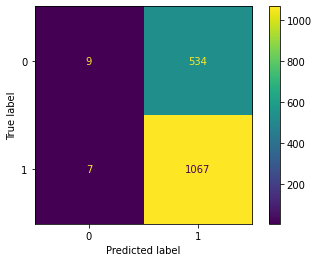

In [327]:
# Test the model and examine the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay 

test_results = wine_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, test_results)

In [267]:
# Calculate the precision, recall, F1-score, AUC and accuracy for the model

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

print(f'Precision: {precision_score(predictions_test, test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

Precision: 0.6664584634603373

Recall: 0.9934823091247672

F1 Score: 0.7977570093457945

AUC: 0.5050284473800631

Accuracy: 0.6654298082869512



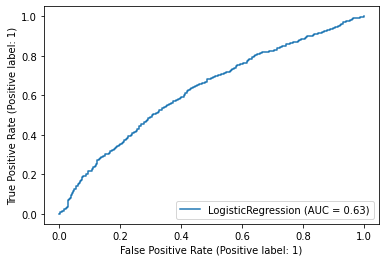

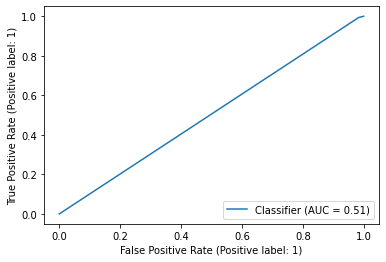

In [268]:
# Plot the ROC curve for the model from the estimator and from the test predictions
from sklearn.metrics import roc_curve, RocCurveDisplay

display = RocCurveDisplay.from_estimator(wine_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, test_results)

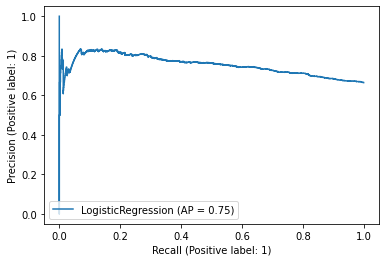

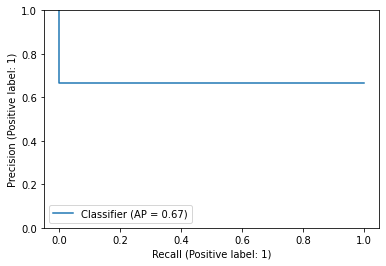

In [269]:
# Plot the Precision/Recall graph for the model using the estimator and from the test results
from sklearn.metrics import PrecisionRecallDisplay

_ = PrecisionRecallDisplay.from_estimator(wine_model, features_test, predictions_test)

display = PrecisionRecallDisplay.from_predictions(predictions_test, test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

In [270]:
# Find the threshold that maximizes precision and recall for the 'good' (1) class label
# Display the F1 score, precision, and recall for this threshold

from sklearn.metrics import precision_recall_curve

test_results_proba = wine_model.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(predictions_test, test_results_proba[:, 1])

precision[precision == 0] = 1e-99
recall[recall == 0] = 1e-99
fscores = (2 * precision * recall) / (precision + recall)

ix = np.argmax(fscores)
print(f'Optimal threshold is {thresholds[ix]}\nF1 Score is {fscores[ix]}\nPrecision is {precision[ix]}\nRecall is {recall[ix]}')

Optimal threshold is 0.4839457121355028
F1 Score is 0.7991054789414834
Precision is 0.6662523306401492
Recall is 0.9981378026070763


**What do you conclude from these statistics?**

The precision indicates that the model has a large false positive rate. Many wines classified as having *good* quality are actually *poor*.

The recall shows that the model has a much smaller false negative rate. A few wines that are classified as *poor* should actually be *good*.

The high recall but low precision results in a misleadingly high F1 score.

The AUC indicates that the model is performing no better than random guesswork.

These statistics show that you should never use one measurement in isolation to judge the performance of a model.

The model *may* appear work better with a probability threshold of 0.484 for the class labels; predictions with a probability less than this value should be a 0, and those at or above this value should be a 1. However, the precision indicates that reducing the threshold is likely to increase the already substantial number of false positives (the precision will dropp) and only reduce the number of false negatives (the recall will improve); it makes a biased model even more biased.

# Evaluate the model

In [271]:
# Calculate the Gini Coefficient for the model
# Gini Coefficient=2×(AUC−1)

from sklearn.metrics import roc_auc_score

auc = roc_auc_score(predictions_test, test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

Gini Coefficient is: 0.010056894760126278


**What does this coefficient signify?**

A Gini Coefficient of 0.01 indicates the model has very poor performance. Ideally, you should aim for a Gini Coefficient greater than 0.6.

In [272]:
# Calculate Cohen's Kappa for the model

from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(predictions_test, test_results)
print(f"Cohen's Kappa is: {kappa_score}")

Cohen's Kappa is: 0.013231407503663362


**What does this value mean?**

The Cohen's Kappa value lies between 0.01 and 0.2. This indicates that there is very slight agreement between the model and the real observations.

In [273]:
# Calculate the Hamming Loss for the model
from sklearn.metrics import hamming_loss

hamming_score = hamming_loss(predictions_test, test_results)
print(f'Hamming Loss is: {hamming_score}')

Hamming Loss is: 0.33457019171304886


**What proportion of the predictions are incorrect?**

The Hamming Loss indicates that 33.5% of the predictions are incorrect. This model is a poor fit.

In [274]:
# Calculate the Matthews Correlation Coefficient for the model

from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(predictions_test, test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

Matthews Correlation Coefficient is: 0.04798553085525724


**How strong is the relationship between the predicted and observed class labels?**

The relationship is between 0 and 0.19, which means there is a negligable relationship.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


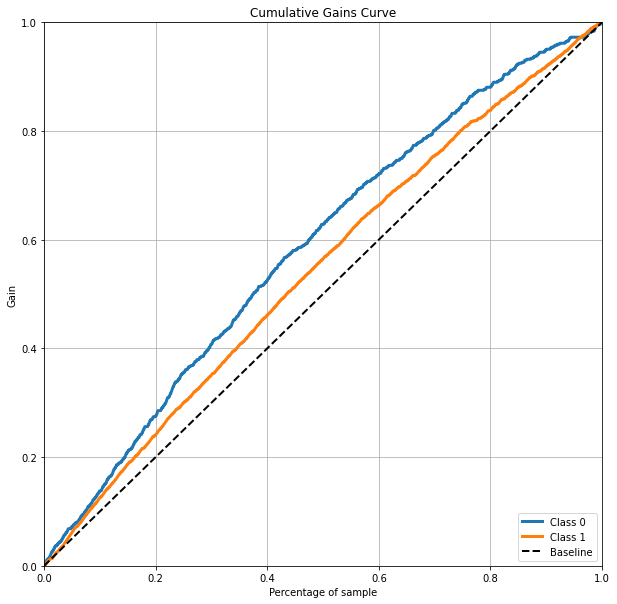

In [275]:
# Plot the cumulative gains chart for the model
!pip install Scikit-plot

import scikitplot as skplt

test_results_proba = wine_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, test_results_proba, figsize=(10, 10))

**Overall, do your findings confirm your earlier conclusions about the precision and recall of the model?**

All of the metrics confirm that the model is currently a very poor fit

# Refine the model - scale the data

In [276]:
# Apply a MinMaxScaler to the wine_features dataframe 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_names = wine_features.columns
scaled_wine_features = pd.DataFrame(scaler.fit_transform(wine_features), columns=column_names)

scaled_wine_features

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,alkalinity,e330.level,effervescence.index,consumable
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.745455,0.216867,0.100177,0.0
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.472727,0.204819,0.800527,0.0
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.509091,0.240964,0.014496,0.0
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.572727,0.192771,0.160492,0.0
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.572727,0.192771,0.629819,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,0.500000,0.174699,0.432459,0.0
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0.609091,0.216867,0.675580,0.0
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,0.754545,0.114458,0.403387,0.0
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,0.436364,0.180723,0.345286,0.0


In [277]:
# Rebuild the model with scaled features:
# - Recreate test and training datasets
# - Build the Logistic Regression model with the same parameters as before

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features_train, features_test, predictions_train, predictions_test = train_test_split(scaled_wine_features, wine_quality, test_size=0.33, random_state=13)
wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

Precision: 0.7742738589211619

Recall: 0.8687150837988827

F1 Score: 0.8187801667397983

AUC: 0.6838971367429036

Accuracy: 0.7445887445887446



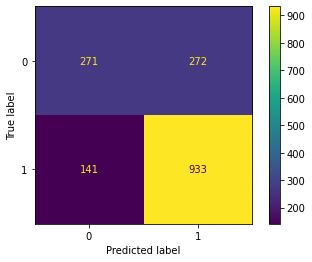

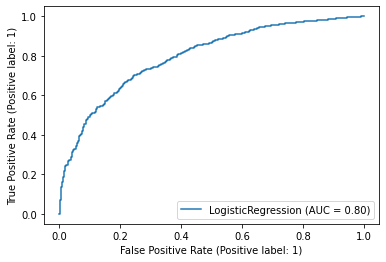

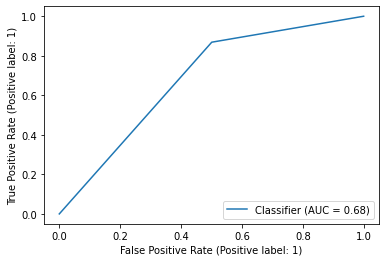

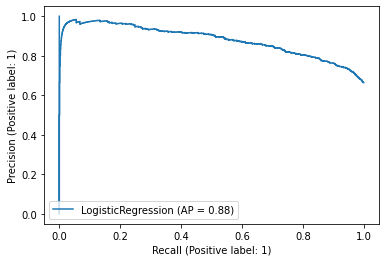

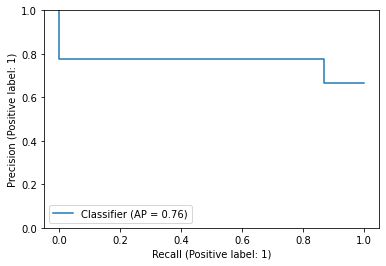

In [278]:
# Test the model
# - Make predictions and examine the confusion matrix
# - Calculate the precision, recall, F1-score, AUC and accuracy for the model
# - Plot the ROC curve for the model from the estimator and from the test predictions
# - Plot the Precision/Recall graph for the model using the estimator and from the test results

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

test_results = wine_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, test_results)

print(f'Precision: {precision_score(predictions_test, test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

display = RocCurveDisplay.from_estimator(wine_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, test_results)

_ = PrecisionRecallDisplay.from_estimator(wine_model, features_test, predictions_test)
display = PrecisionRecallDisplay.from_predictions(predictions_test, test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

Gini Coefficient is: 0.3677942734858073
Cohen's Kappa is: 0.39112037439722536
Hamming Loss is: 0.2554112554112554
Matthews Correlation Coefficient is: 0.39862532565339426


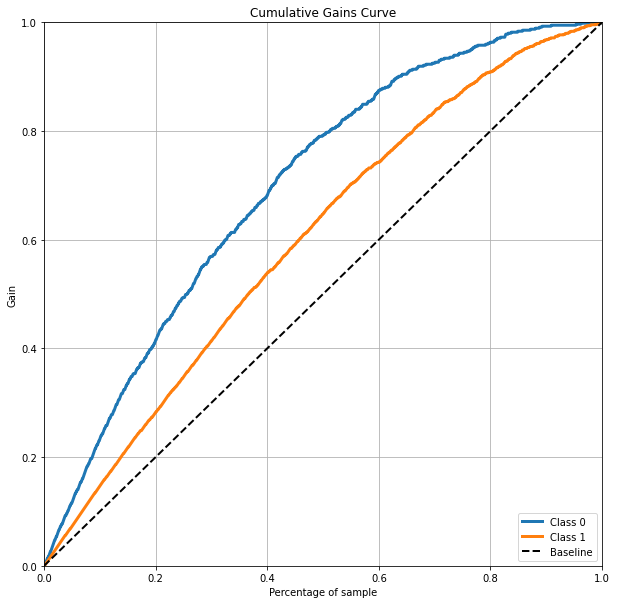

In [279]:
# Evaluate the model
# - Calculate the Gini Coefficient for the model
# - Calculate Cohen's Kappa
# - Calculate the Hamming Loss
# - Calculate the Matthews Correlation Coefficient
# - Plot the cumulative gains chart for the model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, hamming_loss, log_loss, matthews_corrcoef
import scikitplot as skplt

auc = roc_auc_score(predictions_test, test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

kappa_score = cohen_kappa_score(predictions_test, test_results)
print(f"Cohen's Kappa is: {kappa_score}")

hamming_score = hamming_loss(predictions_test, test_results)
print(f'Hamming Loss is: {hamming_score}')

mcc = matthews_corrcoef(predictions_test, test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

test_results_proba = wine_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, test_results_proba, figsize=(10, 10))

**Has the model improved?**

There has been a notable improvement in all metrics. The false positive and false negative rates have both decreased.

# Refine the model - remove constant and quasi-constant features

In [280]:
# Look for features with little variance in the scaled dataframe

print(scaled_wine_features.var())

fixed.acidity           0.006584
volatile.acidity        0.009765
citric.acid             0.005315
residual.sugar          0.006052
chlorides               0.004203
free.sulfur.dioxide     0.003512
total.sulfur.dioxide    0.009723
density                 0.003325
pH                      0.018844
sulphates               0.017610
alcohol                 0.039397
alkalinity              0.018844
e330.level              0.005315
effervescence.index     0.084526
consumable              0.000000
dtype: float64


**Which features have a notably small variance?**

The *consumable* feature has zero variance, so has the same value in every observation

In [134]:
# Verify that 'consumable' has only one value - display all the unique values in this feature

print(np.unique(scaled_wine_features['consumable']))

[0.]


In [281]:
# Rebuild the model without this feature:
# - Drop the feature from the scaled_wine_features dataframe  
# - Recreate test and training datasets
# - Build the Logistic Regression model with the same parameters as before

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

no_constants_wine_features = scaled_wine_features.drop(['consumable'], axis=1)

features_train, features_test, predictions_train, predictions_test = train_test_split(no_constants_wine_features, wine_quality, test_size=0.33, random_state=13)

wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

Precision: 0.7742738589211619

Recall: 0.8687150837988827

F1 Score: 0.8187801667397983

AUC: 0.6838971367429036

Accuracy: 0.7445887445887446



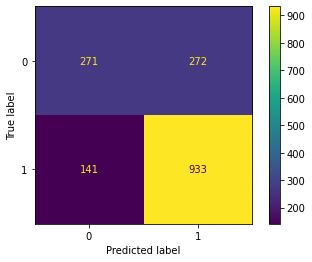

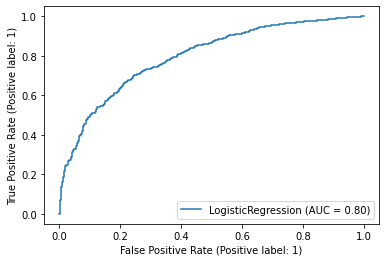

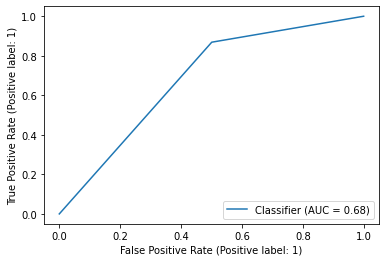

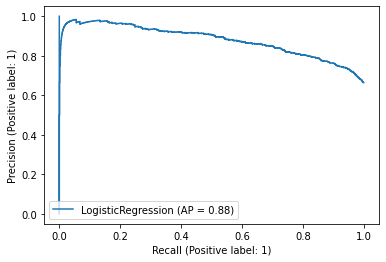

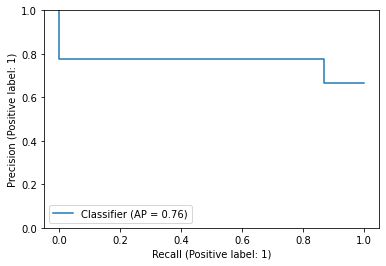

In [282]:
# Test the model
# - Make predictions and examine the confusion matrix
# - Calculate the precision, recall, F1-score, AUC and accuracy for the model
# - Plot the ROC curve for the model from the estimator and from the test predictions
# - Plot the Precision/Recall graph for the model using the estimator and from the test results

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

test_results = wine_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, test_results)

print(f'Precision: {precision_score(predictions_test, test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

display = RocCurveDisplay.from_estimator(wine_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, test_results)

_ = PrecisionRecallDisplay.from_estimator(wine_model, features_test, predictions_test)
display = PrecisionRecallDisplay.from_predictions(predictions_test, test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

Gini Coefficient is: 0.3677942734858073
Cohen's Kappa is: 0.39112037439722536
Hamming Loss is: 0.2554112554112554
Matthews Correlation Coefficient is: 0.39862532565339426


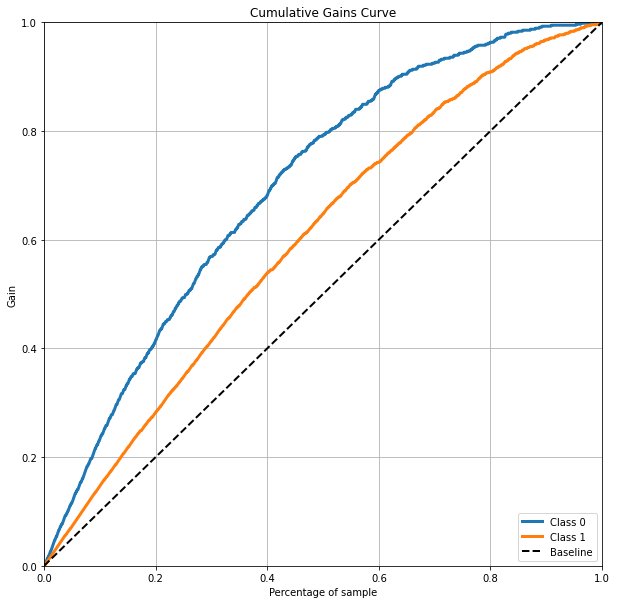

In [283]:
# Evaluate the model
# - Calculate the Gini Coefficient for the model
# - Calculate Cohen's Kappa
# - Calculate the Hamming Loss
# - Calculate the Matthews Correlation Coefficient
# - Plot the cumulative gains chart for the model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, hamming_loss, log_loss, matthews_corrcoef
import scikitplot as skplt

auc = roc_auc_score(predictions_test, test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

kappa_score = cohen_kappa_score(predictions_test, test_results)
print(f"Cohen's Kappa is: {kappa_score}")

hamming_score = hamming_loss(predictions_test, test_results)
print(f'Hamming Loss is: {hamming_score}')

mcc = matthews_corrcoef(predictions_test, test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

test_results_proba = wine_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, test_results_proba, figsize=(10, 10))

**Has the model improved?**

There has been no effect on predictive power. The constant column was probably not an important part of the model, but it makes sense to remove it to save resources.

# Refine the model - find and remove correlated features

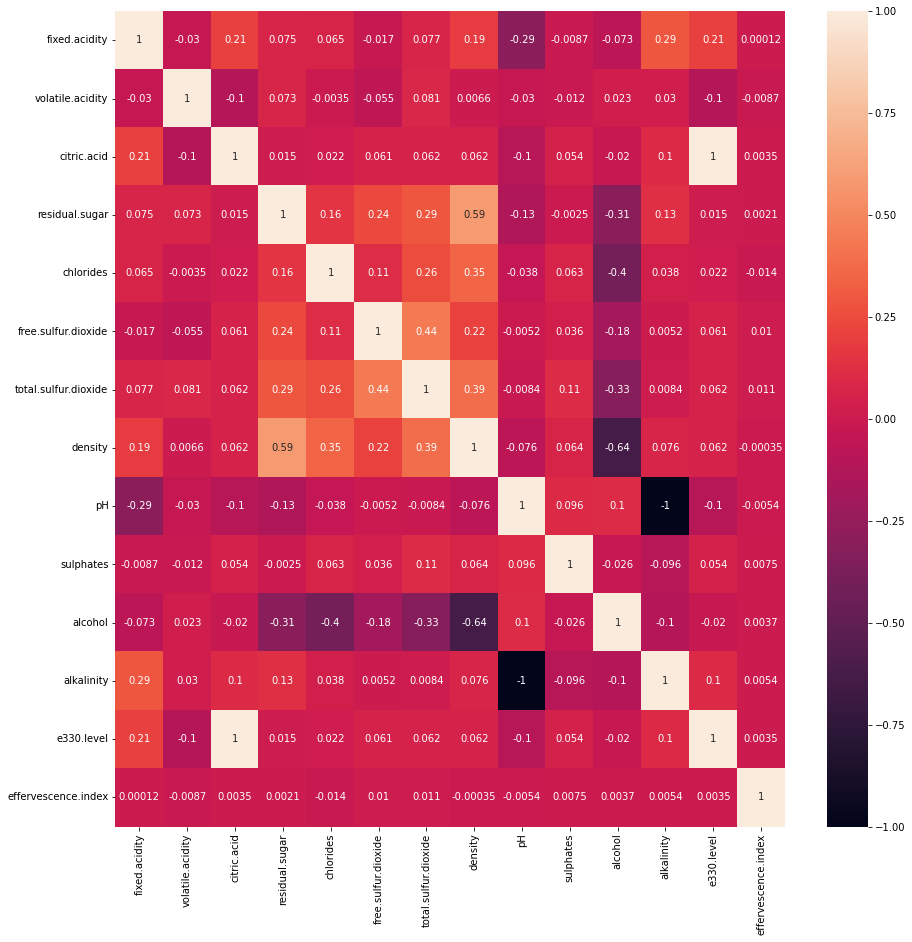

In [284]:
# Find correlated features in the scaled and reduced dataset

import seaborn as sns
from matplotlib import pyplot as plt

correlation_matrix = no_constants_wine_features.corr(method='kendall')
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, linecolor='black')

plt.show()

**Which features show a strong correlation?**

The 'e330.level' and 'citric acid' features have a positive correlation coefficient of 1, meaning that they convey the same information.

The 'pH' and 'alkalinity' columns have a negative correlation coefficient of -1. Alkalinity is the exact converse of pH.

In [285]:
# Remove the e330.level and alkalinity features and rebuild the model
# - Drop the features from the scaled_wine_features dataframe  
# - Recreate test and training datasets
# - Build the Logistic Regression model with the same parameters as before

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

no_correlation_wine_features = no_constants_wine_features.drop(['e330.level', 'alkalinity'], axis=1)

features_train, features_test, predictions_train, predictions_test = train_test_split(no_correlation_wine_features, wine_quality, test_size=0.33, random_state=13)

wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

Precision: 0.7742738589211619

Recall: 0.8687150837988827

F1 Score: 0.8187801667397983

AUC: 0.6838971367429036

Accuracy: 0.7445887445887446



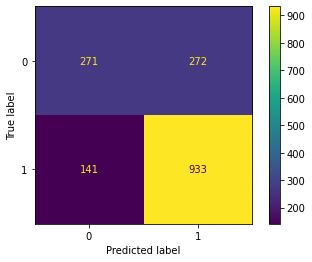

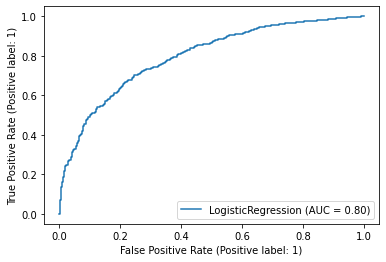

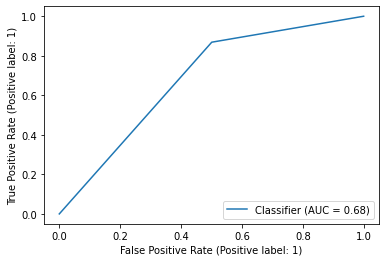

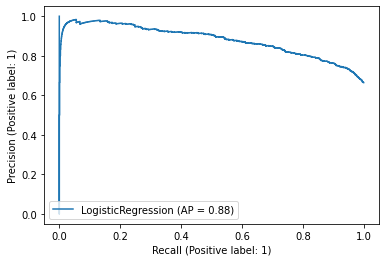

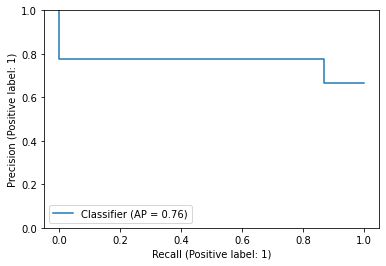

In [286]:
# Test the model
# - Make predictions and examine the confusion matrix
# - Calculate the precision, recall, F1-score, AUC and accuracy for the model
# - Plot the ROC curve for the model from the estimator and from the test predictions
# - Plot the Precision/Recall graph for the model using the estimator and from the test results

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

test_results = wine_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, test_results)

print(f'Precision: {precision_score(predictions_test, test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

display = RocCurveDisplay.from_estimator(wine_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, test_results)

_ = PrecisionRecallDisplay.from_estimator(wine_model, features_test, predictions_test)
display = PrecisionRecallDisplay.from_predictions(predictions_test, test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

Gini Coefficient is: 0.3677942734858073
Cohen's Kappa is: 0.39112037439722536
Hamming Loss is: 0.2554112554112554
Matthews Correlation Coefficient is: 0.39862532565339426


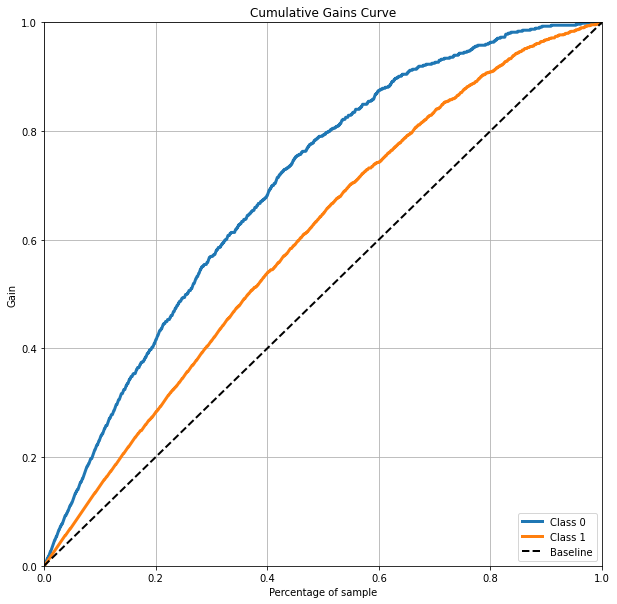

In [287]:
# Evaluate the model
# - Calculate the Gini Coefficient for the model
# - Calculate Cohen's Kappa
# - Calculate the Hamming Loss
# - Calculate the Matthews Correlation Coefficient
# - Plot the cumulative gains chart for the model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, hamming_loss, log_loss, matthews_corrcoef
import scikitplot as skplt

auc = roc_auc_score(predictions_test, test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

kappa_score = cohen_kappa_score(predictions_test, test_results)
print(f"Cohen's Kappa is: {kappa_score}")

hamming_score = hamming_loss(predictions_test, test_results)
print(f'Hamming Loss is: {hamming_score}')

mcc = matthews_corrcoef(predictions_test, test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

test_results_proba = wine_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, test_results_proba, figsize=(10, 10))

**Has the model improved?**

No, but you shouldn't necessarily expect it to have done. Like removing constant and quasi-constant features, the purpose of removing correlated features is to minimize the resources required to build and use the model. The important point is that the model shouldn't be worse as a result. In this case, the metrics are the same as the previous model.

# Refine the model - remove noise using univariate feature selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Permutation explainer: 3282it [05:22,  9.89it/s]                          


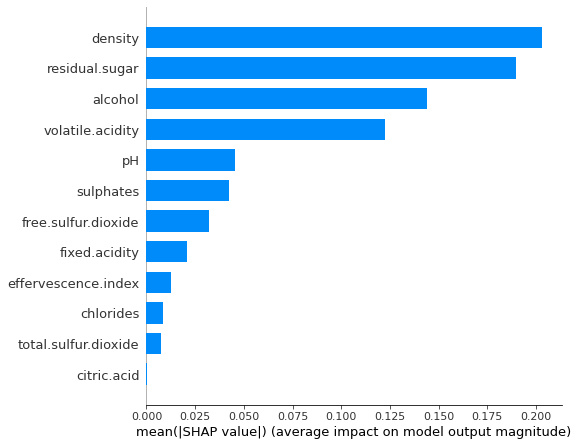

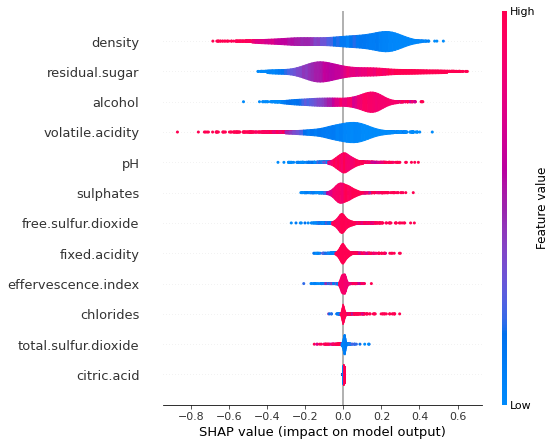

In [288]:
# Perform SHAP analysis to find the features that have the most impact on predictions

!pip install shap

import shap

explainer = shap.Explainer(wine_model.predict, features_test) 
values = explainer(features_train)

shap.summary_plot(shap_values=values, features=features_train, plot_type="bar")
shap.summary_plot(shap_values=values, features=features_train, plot_type="violin") 

In [289]:
# Rebuild the model with only the top five features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

reduced_wine_features = no_correlation_wine_features[['density', 'residual.sugar', 'alcohol', 'volatile.acidity', 'pH']]

features_train, features_test, predictions_train, predictions_test = train_test_split(reduced_wine_features, wine_quality, test_size=0.33, random_state=13)

wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

Precision: 0.7772277227722773

Recall: 0.8770949720670391

F1 Score: 0.8241469816272967

AUC: 0.6899287015031328

Accuracy: 0.75139146567718



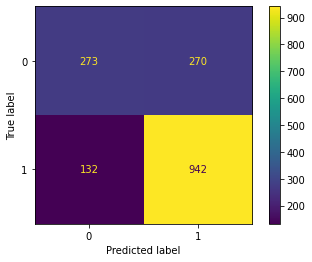

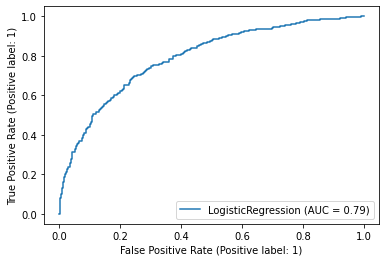

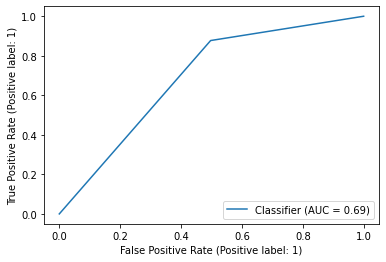

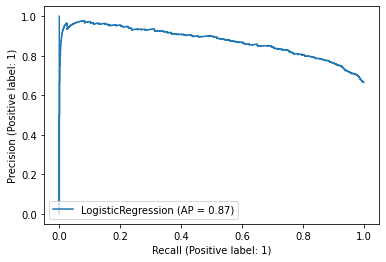

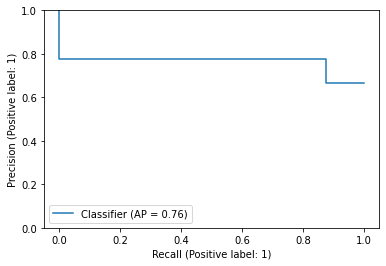

In [290]:
# Test the model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

test_results = wine_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, test_results)

print(f'Precision: {precision_score(predictions_test, test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

display = RocCurveDisplay.from_estimator(wine_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, test_results)

_ = PrecisionRecallDisplay.from_estimator(wine_model, features_test, predictions_test)
display = PrecisionRecallDisplay.from_predictions(predictions_test, test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

Gini Coefficient is: 0.3798574030062656
Cohen's Kappa is: 0.4053221795906269
Hamming Loss is: 0.24860853432282004
Matthews Correlation Coefficient is: 0.4140414574920201


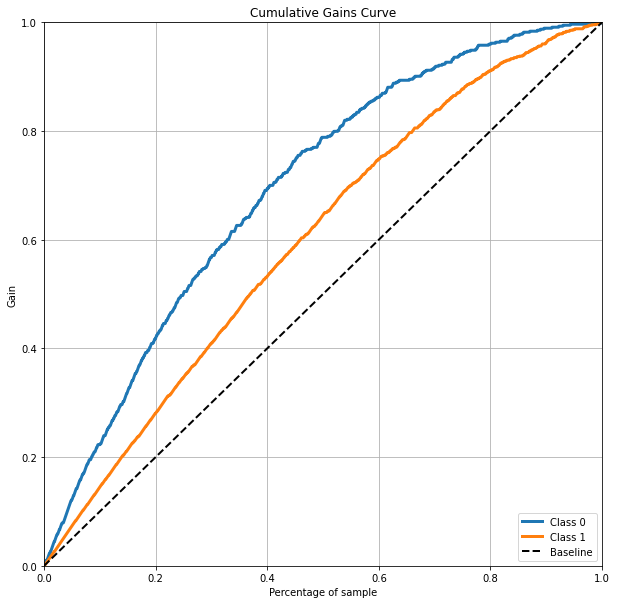

In [291]:
# Evaluate the model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, hamming_loss, log_loss, matthews_corrcoef
import scikitplot as skplt

auc = roc_auc_score(predictions_test, test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

kappa_score = cohen_kappa_score(predictions_test, test_results)
print(f"Cohen's Kappa is: {kappa_score}")

hamming_score = hamming_loss(predictions_test, test_results)
print(f'Hamming Loss is: {hamming_score}')

mcc = matthews_corrcoef(predictions_test, test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

test_results_proba = wine_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, test_results_proba, figsize=(10, 10))

**Has the model improved?**

There is a marginal improvement in the number of true positives and false negatives.

# Refine the model - find the combination of features that give the lowest false positive rate

In [292]:
# Use selectFpr() function to find the best combination of features that minimize the FPR

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import chi2

features_train, features_test, predictions_train, predictions_test = train_test_split(no_correlation_wine_features, wine_quality, test_size=0.33, random_state=13)

features_selector = SelectFpr(score_func=chi2)
_ = features_selector.fit(features_train, predictions_train)

In [293]:
# Print the feature names and scores

feature_names = features_selector.get_feature_names_out()

for i in range(len(feature_names)):
	print(f'Feature {feature_names[i]}: {features_selector.scores_[i]}')

Feature volatile.acidity: 0.5621892283308053
Feature chlorides: 7.610934053388932
Feature density: 0.0013141025907080451
Feature alcohol: 2.055874521571751


**How does this compare to the features found by using SHAP analysis?**

The list found by using forward selection was 'density', 'residual.sugar', 'alcohol', 'volatile.acidity', and 'pH'. These results suggest that selecting the features 'volatile.acidity', 'chlorides', 'density', and 'alcohol' will give the lowest FPR.

In [294]:
# Rebuild the model with these features

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

reduced_wine_features = no_correlation_wine_features[['volatile.acidity', 'chlorides', 'density', 'alcohol']]

features_train, features_test, predictions_train, predictions_test = train_test_split(reduced_wine_features, wine_quality, test_size=0.33, random_state=13)

wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

Precision: 0.7773144286905754

Recall: 0.8677839851024208

F1 Score: 0.8200615926088869

AUC: 0.6880356389600502

Accuracy: 0.7470624613481757



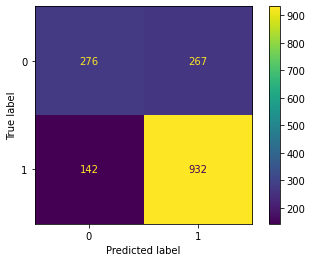

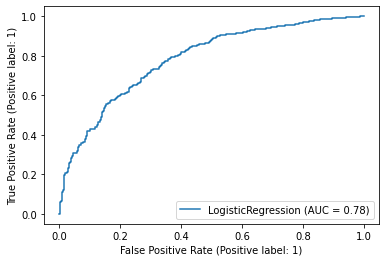

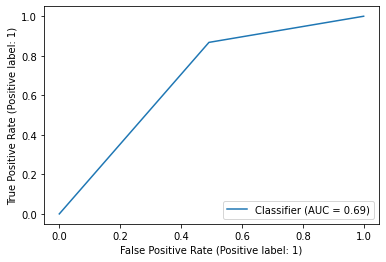

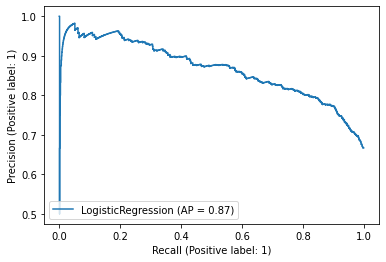

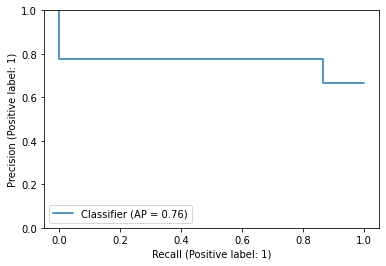

In [295]:
# Test the model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

test_results = wine_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, test_results)

print(f'Precision: {precision_score(predictions_test, test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

display = RocCurveDisplay.from_estimator(wine_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, test_results)

_ = PrecisionRecallDisplay.from_estimator(wine_model, features_test, predictions_test)
display = PrecisionRecallDisplay.from_predictions(predictions_test, test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

Gini Coefficient is: 0.3760712779201003
Cohen's Kappa is: 0.3987639876398764
Hamming Loss is: 0.2529375386518244
Matthews Correlation Coefficient is: 0.4056714915998611


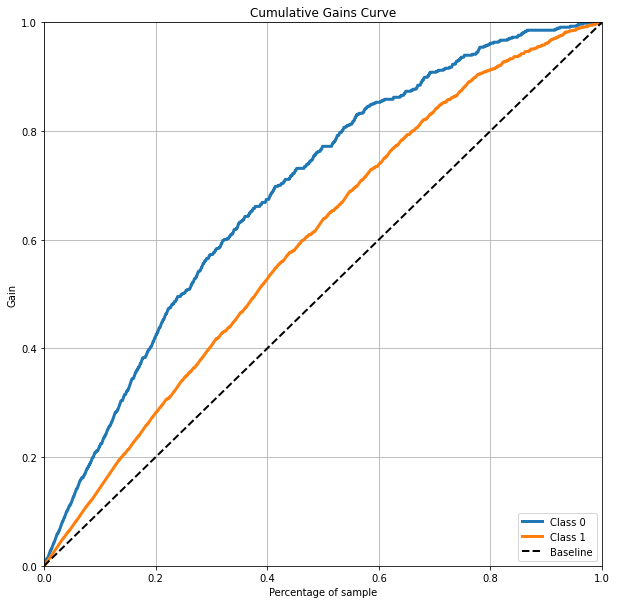

In [296]:
# Evaluate the model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, hamming_loss, log_loss, matthews_corrcoef
import scikitplot as skplt

auc = roc_auc_score(predictions_test, test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

kappa_score = cohen_kappa_score(predictions_test, test_results)
print(f"Cohen's Kappa is: {kappa_score}")

hamming_score = hamming_loss(predictions_test, test_results)
print(f'Hamming Loss is: {hamming_score}')

mcc = matthews_corrcoef(predictions_test, test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

test_results_proba = wine_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, test_results_proba, figsize=(10, 10))

**Has the model improved?**

There is a very small decrease in the FPR but also a decrease in the TPR and an increase in the FNR.

# Refine the model - remove noise using multivariate feature selection

In [297]:
# Use forward selection to find the best combination of features

from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

logistic_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3) 

features_train, features_test, predictions_train, predictions_test = train_test_split(no_correlation_wine_features, wine_quality, test_size=0.33, random_state=13)

sfs_forward = SequentialFeatureSelector(logistic_model, n_features_to_select=5, direction="forward")
_ = sfs_forward.fit(features_train, predictions_train) 

print(f'Features selected by forward sequential selection: {sfs_forward.get_feature_names_out()}') 

Features selected by forward sequential selection: ['fixed.acidity' 'volatile.acidity' 'residual.sugar' 'pH' 'alcohol']


In [298]:
# Rebuild the model with only the top five features

from sklearn.linear_model import LogisticRegression

reduced_wine_features = no_correlation_wine_features[sfs_forward.get_feature_names_out()]

features_train, features_test, predictions_train, predictions_test = train_test_split(reduced_wine_features, wine_quality, test_size=0.33, random_state=13)

wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

Precision: 0.7786885245901639

Recall: 0.8845437616387337

F1 Score: 0.8282476024411507

AUC: 0.6936530962889801

Accuracy: 0.756338899196042



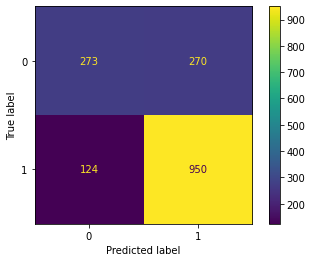

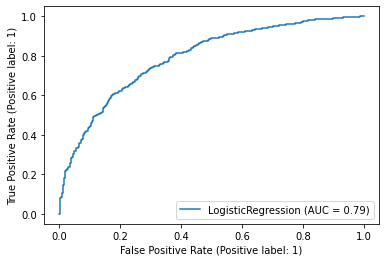

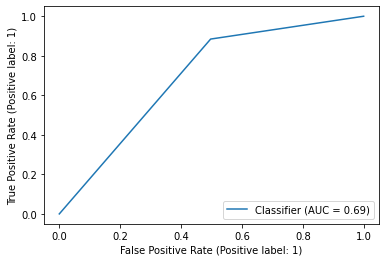

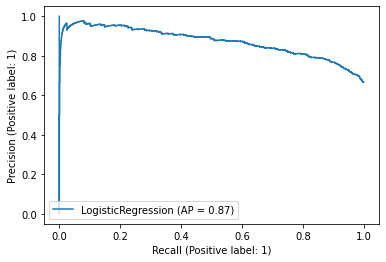

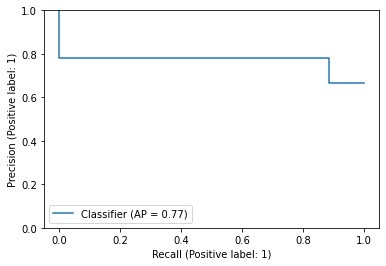

In [299]:
# Test the model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

test_results = wine_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, test_results)

print(f'Precision: {precision_score(predictions_test, test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

display = RocCurveDisplay.from_estimator(wine_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, test_results)

_ = PrecisionRecallDisplay.from_estimator(wine_model, features_test, predictions_test)
display = PrecisionRecallDisplay.from_predictions(predictions_test, test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

Gini Coefficient is: 0.3873061925779602
Cohen's Kappa is: 0.414882654719986
Hamming Loss is: 0.24366110080395795
Matthews Correlation Coefficient is: 0.4249925603812019


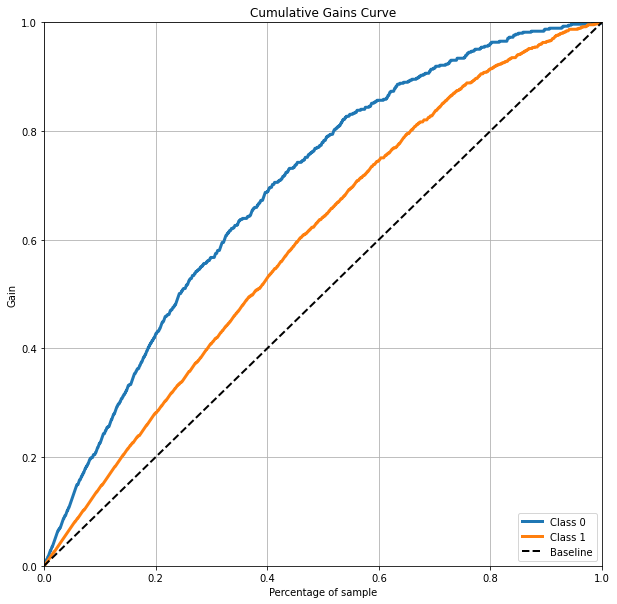

In [300]:
# Evaluate the model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, hamming_loss, log_loss, matthews_corrcoef
import scikitplot as skplt

auc = roc_auc_score(predictions_test, test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

kappa_score = cohen_kappa_score(predictions_test, test_results)
print(f"Cohen's Kappa is: {kappa_score}")

hamming_score = hamming_loss(predictions_test, test_results)
print(f'Hamming Loss is: {hamming_score}')

mcc = matthews_corrcoef(predictions_test, test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

test_results_proba = wine_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, test_results_proba, figsize=(10, 10))

**Has the model improved?**

Multivariate forward selection has produced a better model overall than univariate feature selection. The Matthews Correlation Coefficient now indicates a strong relationship between the observed values and predictions made by the model, although the Gini Coefficient is still relatively low.

# Investigate the impact of regularization on the model

In [301]:
# Measure the learning rate of the model before regularization

from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression

features_train, features_test, predictions_train, predictions_test = train_test_split(no_constants_wine_features, wine_quality, test_size=0.33, random_state=13)
wine_model = LogisticRegression(solver='saga', penalty='none', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

# Compute the data for the learning curve using 10-fold cross validation of the model
train_sizes, train_scores, test_scores = learning_curve(estimator=wine_model, X=features_train, y=predictions_train, train_sizes=np.linspace(0.1, 1.0, 19), cv=10, scoring='precision')

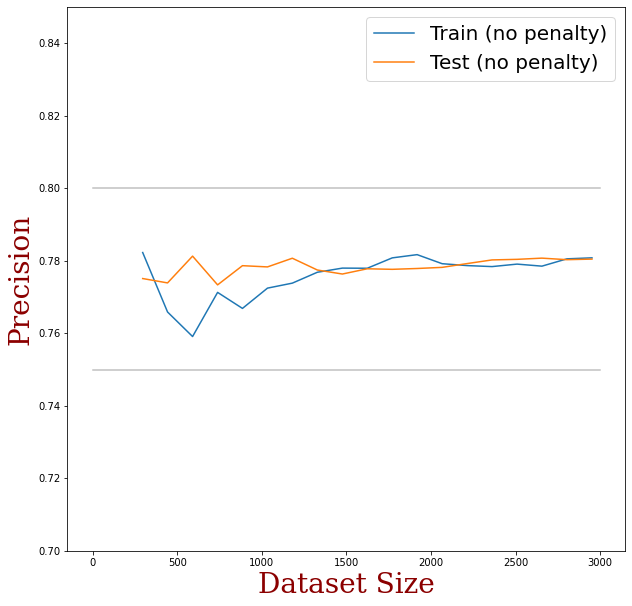

Best test score precision: 0.781309534778857


In [302]:
# Plot the learning curve

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot((0,3000), (0.75,0.75), c='Grey', alpha=0.5)
plt.plot((0,3000), (0.80,0.80), c='Grey', alpha=0.5)
plt.plot(train_sizes, np.mean(train_scores,axis=1), label='Train (no penalty)')
plt.plot(train_sizes, np.mean(test_scores,axis=1), label='Test (no penalty)')
plt.xlabel('Dataset Size', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylabel('Precision', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylim(bottom=0.7, top=0.85)
plt.legend(prop={'size': 20})
plt.show()

print(f'Best test score precision: {np.max(np.mean(test_scores,axis=1))}')

In [303]:
# Measure the learning rate of the model with L1 regularization

wine_model = LogisticRegression(solver='saga', penalty='l1', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

# Compute the data for the learning curve using 10-fold cross validation of the model
train_sizes, train_scores, test_scores = learning_curve(estimator=wine_model, X=features_train, y=predictions_train, train_sizes=np.linspace(0.1, 1.0, 19), cv=10, scoring='precision')

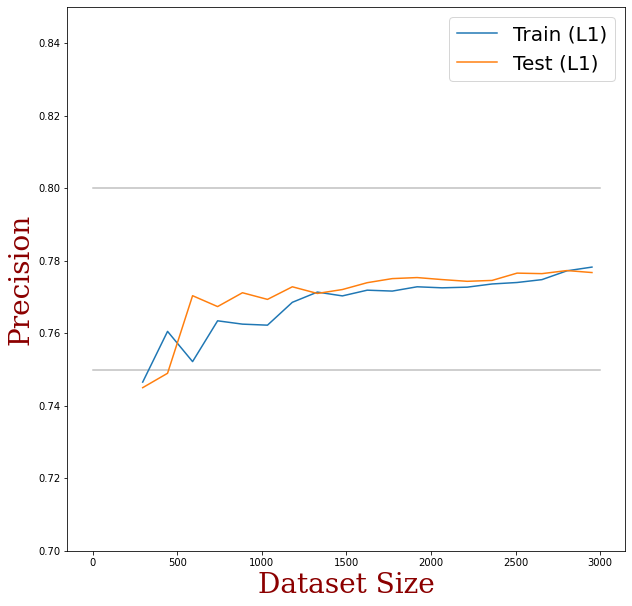

Best test score precision: 0.7773283443123157


In [304]:
# Plot the learning curve

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot((0,3000), (0.75,0.75), c='Grey', alpha=0.5)
plt.plot((0,3000), (0.80,0.80), c='Grey', alpha=0.5)
plt.plot(train_sizes, np.mean(train_scores,axis=1), label='Train (L1)')
plt.plot(train_sizes, np.mean(test_scores,axis=1), label='Test (L1)')
plt.xlabel('Dataset Size', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylabel('Precision', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylim(bottom=0.7, top=0.85)
plt.legend(prop={'size': 20})
plt.show()

print(f'Best test score precision: {np.max(np.mean(test_scores,axis=1))}')

In [305]:
# Measure the learning rate of the model with L2 regularization

wine_model = LogisticRegression(solver='saga', penalty='l2', max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

# Compute the data for the learning curve using 10-fold cross validation of the model
train_sizes, train_scores, test_scores = learning_curve(estimator=wine_model, X=features_train, y=predictions_train, train_sizes=np.linspace(0.1, 1.0, 19), cv=10, scoring='precision')

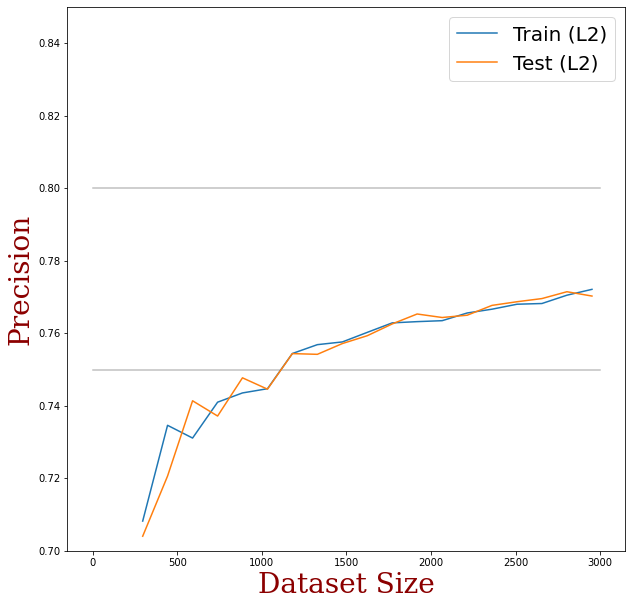

Best test score precision: 0.7714883544972564


In [306]:
# Plot the learning curve

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot((0,3000), (0.75,0.75), c='Grey', alpha=0.5)
plt.plot((0,3000), (0.80,0.80), c='Grey', alpha=0.5)
plt.plot(train_sizes, np.mean(train_scores,axis=1), label='Train (L2)')
plt.plot(train_sizes, np.mean(test_scores,axis=1), label='Test (L2)')
plt.xlabel('Dataset Size', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylabel('Precision', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylim(bottom=0.7, top=0.85)
plt.legend(prop={'size': 20})
plt.show()

print(f'Best test score precision: {np.max(np.mean(test_scores,axis=1))}')

In [307]:
# Measure the learning rate of the model with Elastic Net regularization

wine_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=2000, tol=1e-3)
_ = wine_model.fit(features_train, predictions_train)

# Compute the data for the learning curve using 10-fold cross validation of the model
train_sizes, train_scores, test_scores = learning_curve(estimator=wine_model, X=features_train, y=predictions_train, train_sizes=np.linspace(0.1, 1.0, 19), cv=10, scoring='precision')

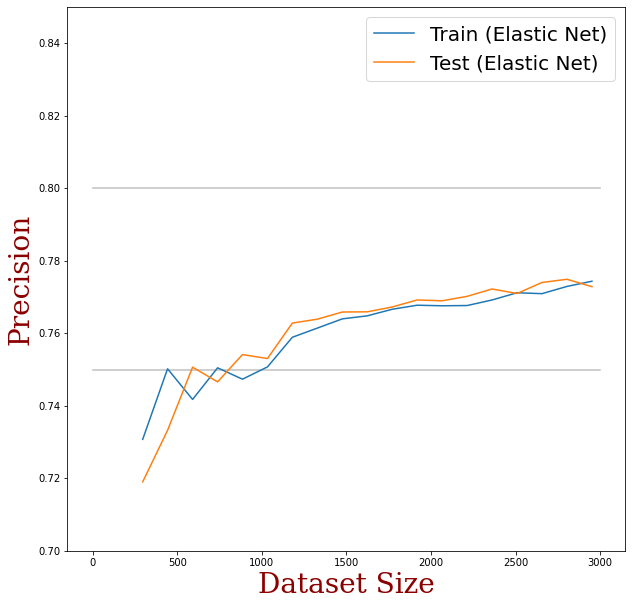

Best test score precision: 0.7749265487671976


In [308]:
# Plot the learning curve

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot((0,3000), (0.75,0.75), c='Grey', alpha=0.5)
plt.plot((0,3000), (0.80,0.80), c='Grey', alpha=0.5)
plt.plot(train_sizes, np.mean(train_scores,axis=1), label='Train (Elastic Net)')
plt.plot(train_sizes, np.mean(test_scores,axis=1), label='Test (Elastic Net)')
plt.xlabel('Dataset Size', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylabel('Precision', fontdict={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size': 28})
plt.ylim(bottom=0.7, top=0.85)
plt.legend(prop={'size': 20})
plt.show()

print(f'Best test score precision: {np.max(np.mean(test_scores,axis=1))}')

**What do you conclude about applying the different forms of regularization to this model?**

L1 regularization and L2 regularization both have a small detrimental effect. The model is not being overfitted, so regularization is probably unnecessary.

# Compare the Logistic Regression model to a Random Forest model

In [309]:
# Create a random forest model over the same data

from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
_ = forest_model.fit(features_train, predictions_train)

Precision: 0.851304347826087

Recall: 0.8845437616387337

F1 Score: 0.8803956834532375

AUC: 0.7983142483821517

Accuracy: 0.756338899196042



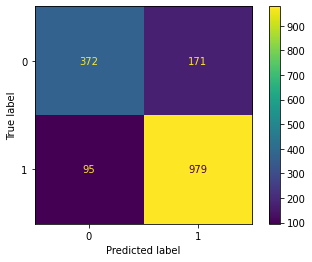

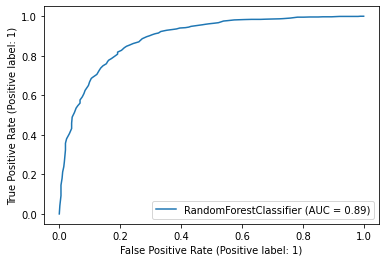

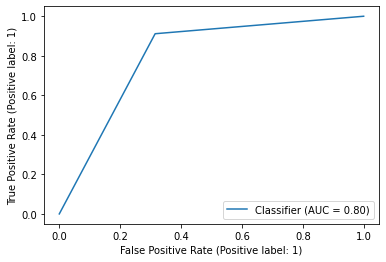

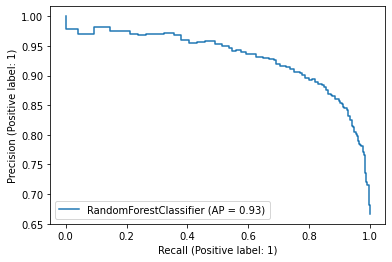

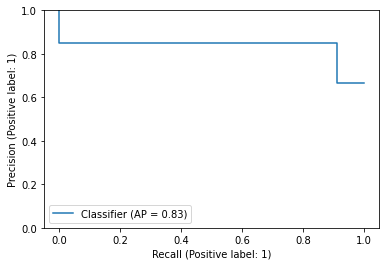

In [310]:
# Test the random forest model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay

rf_test_results = forest_model.predict(features_test)
_ = ConfusionMatrixDisplay.from_predictions(predictions_test, rf_test_results)

print(f'Precision: {precision_score(predictions_test, rf_test_results, zero_division=0)}\n')
print(f'Recall: {recall_score(predictions_test, test_results, zero_division=0)}\n')
print(f'F1 Score: {f1_score(predictions_test, rf_test_results, zero_division=0)}\n')
print(f'AUC: {roc_auc_score(predictions_test, rf_test_results)}\n')
print(f'Accuracy: {accuracy_score(predictions_test, test_results)}\n')

display = RocCurveDisplay.from_estimator(forest_model, features_test, predictions_test)
display = RocCurveDisplay.from_predictions(predictions_test, rf_test_results)

_ = PrecisionRecallDisplay.from_estimator(forest_model, features_test, predictions_test)
display = PrecisionRecallDisplay.from_predictions(predictions_test, rf_test_results)
_ = display.ax_.set_ylim(bottom=0, top=1)

Gini Coefficient is: 0.5966284967643034
Cohen's Kappa is: 0.6180115949442633
Hamming Loss is: 0.1645021645021645
Matthews Correlation Coefficient is: 0.6217255106959566


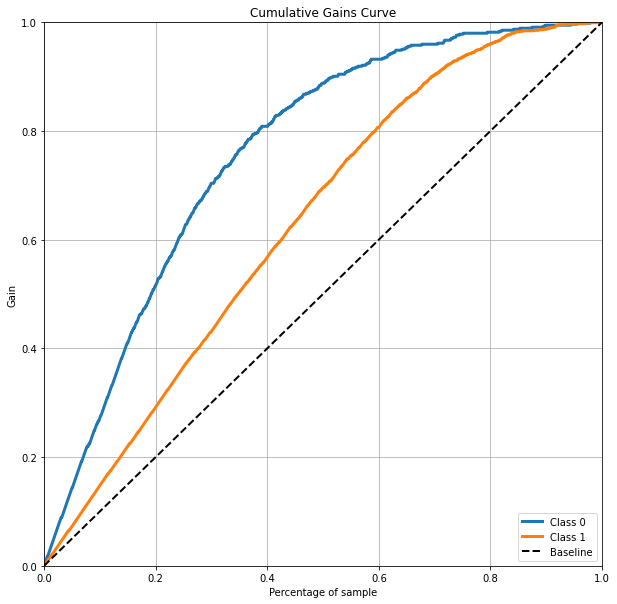

In [311]:
# Evaluate the model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, hamming_loss, log_loss, matthews_corrcoef
import scikitplot as skplt

auc = roc_auc_score(predictions_test, rf_test_results)
gini_coeff = (2 * auc) - 1
print(f'Gini Coefficient is: {gini_coeff}')

kappa_score = cohen_kappa_score(predictions_test, rf_test_results)
print(f"Cohen's Kappa is: {kappa_score}")

hamming_score = hamming_loss(predictions_test, rf_test_results)
print(f'Hamming Loss is: {hamming_score}')

mcc = matthews_corrcoef(predictions_test, rf_test_results)
print(f'Matthews Correlation Coefficient is: {mcc}')

rf_test_results_proba = forest_model.predict_proba(features_test)
_ = skplt.metrics.plot_cumulative_gain(predictions_test, rf_test_results_proba, figsize=(10, 10))

**How does this model compare to the Logistic Regression model?**

The random forest model has significantly better recall and precision than the logistic regression model. Overall its performance is superior.

In [313]:
# Perform McNemar's test to compare the error rates of the models

!pip install Mlxtend

from mlxtend.evaluate import mcnemar_table, mcnemar

table = mcnemar_table(y_target=predictions_test, y_model1=test_results, y_model2=rf_test_results)

chi2, p = mcnemar(ary=table, corrected=True)
print(f'\nContingency table\n{table}')
print(f'\nchi-squared statistic: {chi2}, p-value: {p}\n')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Contingency table
[[1157  194]
 [  66  200]]

chi-squared statistic: 62.034615384615385, p-value: 3.3747263068472162e-15



**What does this test indicate?**

The p-value is very small 0.05. The difference in error rates between the two models is statistically significant.

In [314]:
# Perform 5x2 cross-validation test to compare the models

from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=wine_model, estimator2=forest_model, X=features_train, y=predictions_train)

print(f't-statistic: {t}')
print(f'p-value: {p}')

t-statistic: -7.069843191859209
p-value: 0.0008757737835590589


**Is there a significance in the difference of the accuracy of the two models?**

The p-value is very low and is below the accepted threshold of 5% for statistical significance. This result indicates that although there is a statistically significant difference in the accuracy of the two models.

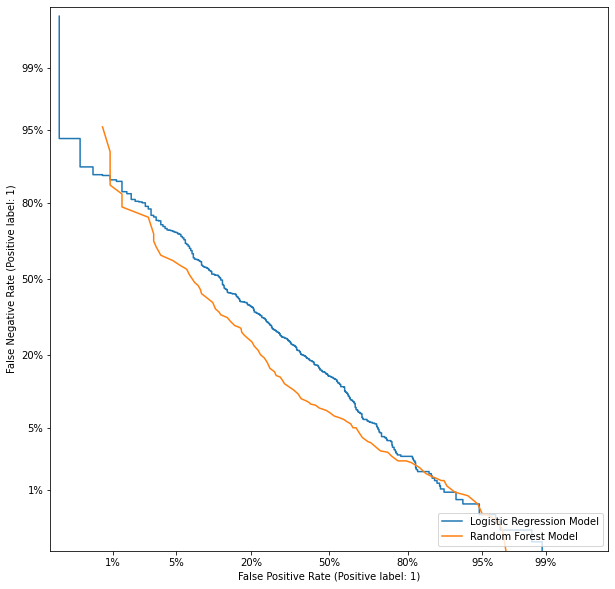

In [315]:
# Compare the DET curves for the two models

from sklearn.metrics import DetCurveDisplay
import matplotlib.pyplot as plt

fig, ax_det = plt.subplots(1, 1, figsize=(10, 10))
_ = DetCurveDisplay.from_estimator(wine_model, features_test, predictions_test, ax=ax_det, name='Logistic Regression Model')

_ = DetCurveDisplay.from_estimator(forest_model, features_test, predictions_test, ax=ax_det, name='Random Forest Model')


**How does the Logistic Regression model compare to the Random Forest model**

The DET curve shows that the Random Forest model generally has a lower error rate that the Logistic Regression model. Remember that the axes on this graph have a non-linear scale.

#Conclusions

It is important to understand how to measure the effects of tuning a model in different ways, and how to compare the performance of two models.

Scaling the features can has a notable effect on a linear model, although the results will likely be less dramatic on a tree-based model.

This exercise also highlights that algorithm selection is an important part of building a machine learning classification model. The random forest model worked much better than the logistic regression model, even without performing any tuning.